# PM2.5 Data Processing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [2]:
def load_dataset(filename):
    df_city = pd.read_csv(filename)
    cols = np.array(df_city.columns, dtype = np.str)
    stations = []
    for col in cols:
        if col.startswith('PM_'):
            stations.append(col)
    return (df_city, stations)

In [3]:
data_beijing, stations_beijing = load_dataset('FiveCitiePMData/BeijingPM20100101_20151231.csv')

In [4]:
data_beijing

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0
52580,52581,2015,12,31,20,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0
52581,52582,2015,12,31,21,4,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0
52582,52583,2015,12,31,22,4,204.0,242.0,221.0,212.0,-10.0,73.0,1030.0,-6.0,NE,1.78,0.0,0.0


In [5]:
stations_beijing

['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']

In [6]:
data_beijing.index = data_beijing['No'] - 1
data_beijing.drop('No', axis = 1, inplace = True)

In [7]:
data_beijing

,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
No,,,,,,,,,,,,,,,,,
0,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2015,12,31,19,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0
52580,2015,12,31,20,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0
52581,2015,12,31,21,4,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0


Since `year`, `month`, `day`, `hour`, and `season` essentially serve as an identifier for each different row, so we do not need to analyze the datetime and exclude from further analysis.

In [8]:
data_beijing.drop(['year', 'month', 'day', 'hour', 'season'], axis = 1, inplace = True)

In [9]:
data_beijing

,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
No,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52579,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0
52580,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0
52581,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0


## Correlation Matrix

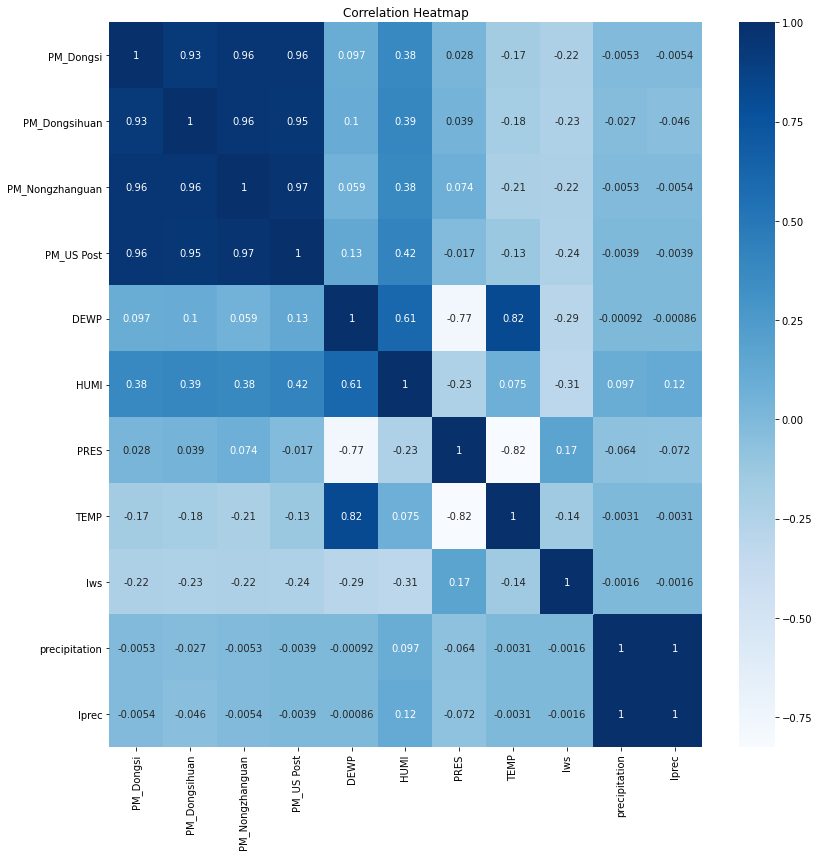

In [10]:
fig = plt.figure(figsize = (12, 12))
fig.set_tight_layout(True)
ax = fig.gca()
ax.set_title('Correlation Heatmap')
sns.heatmap(data_beijing.corr(), ax = ax, annot = True, cmap = 'Blues')
plt.savefig('out_graphs/raw_corr.png')
plt.savefig('out_graphs/raw_corr.pdf')
plt.show()

## Data Cleaning

According to the Correlated Heatmap, `Iprec` and `precipitation` are highly correlated, so we can preserve one of them.

In [12]:
percentage = data_beijing.loc[data_beijing['precipitation'] == data_beijing['Iprec']].shape[0] / data_beijing.shape[0]

In [13]:
percentage

0.9641335767533851

The percentage of identical `precipitation` and `Iprec` levels is 96.41%. Thus, we can remove either one feature. In my case, I decide to remove `Iprec` feature.

In [15]:
data_beijing.drop('Iprec', axis = 1, inplace = True)

In [16]:
data_beijing

,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation
No,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0
1,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0
2,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0
3,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0
4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0
...,...,...,...,...,...,...,...,...,...,...,...
52579,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0
52580,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0
52581,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0


We note that the PM2.5 density measured in different stations are similar, so I can use PM2.5 density from the station that has the most complete record.

In [18]:
data_beijing.count()

PM_Dongsi          25052
PM_Dongsihuan      20508
PM_Nongzhanguan    24931
PM_US Post         50387
DEWP               52579
HUMI               52245
PRES               52245
TEMP               52579
cbwd               52579
Iws                52579
precipitation      52100
dtype: int64

Thus, `PM_US Post` has the most complete records. I will remove `PM_Dongsi`, `PM_Dongsihuan`, and `PM_Nongzhanguan`.

In [19]:
data_beijing.drop(['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan'], axis = 1, inplace = True)

In [20]:
data_beijing

,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation
No,,,,,,,,
0,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0
1,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0
2,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0
3,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0
4,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0
...,...,...,...,...,...,...,...,...
52579,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0
52580,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0
52581,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0
